In [1]:
# after parameter learning, so sigma is learned 

# =======
# Q = 1/sum(wwT, Sigma)
# V = Var(|f(xij - mu_xij)|) = (xij - mu_xij)^2

# #para:  X2, Q2 
# #asym:  X2, Q2, Var(|f(xij - mu_xij)|) = (xij - mu_xij)^2 min 5%

# #para:  X2, 
# #asym:  X2, Var(|f(xij - mu_xij)|) = (xij - mu_xij)^2 min 5%

# recomb submission: 
# 1/(xij - mu_xij) 2SD

In [2]:
source("visualize.utils.r")
source("analysis.utils.r")
set.seed(2023)

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow

Registering fonts with R

hash-2.2.6.2 provided by Decision Patterns



Attaching package: ‘rlang’


The following object is masked from ‘package:hash’:

    hash


Warning message:
“package ‘MASS’ was built under R version 4.1.3”

Attaching package: ‘pracma’


The following object is masked from ‘package:hash’:

    clear




In [3]:
pheno = "age"
#pheno = "gender"

In [4]:
figure.dir  = "../Figure/Asymptotics"
result.dir = "/u/project/halperin/johnsonc/TCAx/TCAx2023/Result/Methylation/Consistency/XY/"
if (!file.exists(figure.dir)){dir.create(file.path(figure.dir),recursive = T)}
if (!file.exists(result.dir)){print("check results_dir")}

In [5]:
data.names = c("liu", "hannon1", "hannon2", "hannum")
full.data.names = list("liu" = "Liu et al. (n= 687)",
                       "hannon1" = "Hannon et al. I (n= 675)", 
                       "hannon2" = "Hannon et al. II (n= 665)",
                       "hannum" = "Hannum et al. (n= 590)")

#make sure every dataset pvals columns are in the same order 
source.ids = c("Gran", "CD4T", "CD8T", "Mono", "B", "NK")
k = length(source.ids)

# load pvals

In [6]:
pval.list  = list()
for (data.name in data.names){
    pval  = list()
    
    mean_penalty  = 0
    var_penalty   = 0
    covar_penalty = 0
    max_stds      = 2
    model_tau     = FALSE
    
    # signal
    tcax.mdl = readRDS(file.path(result.dir, 
                                 data.name, 
                                 paste0("tcax.mdl.mp.", mean_penalty, ".vp.",var_penalty, ".cp.", covar_penalty, 
                                        ".maxStds.", max_stds, ".tau.", model_tau,".rds")))
    pval[[paste0("TCAx.parametric.X2")]]     = tcax.mdl$params.hat[["parametric.X2"]]$gammas_hat_pvals[,paste(source.ids, pheno, sep=".")]
    pval[[paste0("TCAx.parametric.X2Q2")]]   = tcax.mdl$params.hat[["parametric.X2Q2"]]$gammas_hat_pvals[,paste(source.ids, pheno, sep=".")]
    pval[[paste0("TCAx.asymptotic.X2V5")]]   = tcax.mdl$params.hat[["asymptotic.X2V5"]]$gammas_hat_pvals[,paste(source.ids, pheno, sep=".")]
    pval[[paste0("TCAx.asymptotic.X2Q2V5")]] = tcax.mdl$params.hat[["asymptotic.X2Q2V5"]]$gammas_hat_pvals[,paste(source.ids, pheno, sep=".")]
    
    # null 
    tcax.mdl = readRDS(file.path(result.dir, 
                                 paste0(data.name, "-", pheno, "-shuffled"),
                                 paste0("tcax.mdl.mp.", mean_penalty, ".vp.",var_penalty, ".cp.", covar_penalty, 
                                        ".maxStds.", max_stds, ".tau.", model_tau,".rds")))
    pval[[paste0("TCAx.asymptotic.X2V5.null")]]   = tcax.mdl$params.hat[["asymptotic.X2V5"]]$gammas_hat_pvals[,paste(source.ids, pheno, sep=".")]
    pval[[paste0("TCAx.asymptotic.X2Q2V5.null")]] = tcax.mdl$params.hat[["asymptotic.X2Q2V5"]]$gammas_hat_pvals[,paste(source.ids, pheno, sep=".")]
    
    # collect result
    pval.list[[data.name]]  = pval
    
}

In [7]:
str(pval.list)

List of 4
 $ liu    :List of 6
  ..$ TCAx.parametric.X2         : num [1:153155, 1:6] 0.202 0.516 0.21 0.165 0.521 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:153155] "cg00001349" "cg00002837" "cg00003287" "cg00008647" ...
  .. .. ..$ : chr [1:6] "Gran.age" "CD4T.age" "CD8T.age" "Mono.age" ...
  ..$ TCAx.parametric.X2Q2       : num [1:153155, 1:6] 0.161 0.504 0.192 0.108 0.344 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:153155] "cg00001349" "cg00002837" "cg00003287" "cg00008647" ...
  .. .. ..$ : chr [1:6] "Gran.age" "CD4T.age" "CD8T.age" "Mono.age" ...
  ..$ TCAx.asymptotic.X2V5       : num [1:153155, 1:6] 0.1771 0.5077 0.2125 0.0901 0.5908 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:153155] "cg00001349" "cg00002837" "cg00003287" "cg00008647" ...
  .. .. ..$ : chr [1:6] "Gran.age" "CD4T.age" "CD8T.age" "Mono.age" ...
  ..$ TCAx.asymptotic.X2Q2V5     : num [1:153155, 1:6] 0.1404 0.4876 0.1873 0.0499 0.3596 ...
  .. ..- attr(*,

# Visualization

In [8]:
#source("visualize.utils.r")
text.size = 20
labels = paste0(if(pheno == "gender") "Sex: " else "Age: ", source.ids)
labels

[1] "Age: Gran" "Age: CD4T" "Age: CD8T" "Age: Mono" "Age: B"    "Age: NK"

In [9]:
plot_qq_compare <- function(pvals_mat1, pvals_mat2, labels, ggarrange.nrow = 1, ggarrange.ncol = 1, 
                            alpha = 0.05, text.size = 10, 
                            xlab = "pval1", ylab = "pval2", title = ""){

    pvals1 = list()
    pvals2 = list()
    
    for (l in 1:ncol(pvals_mat1)){
        pvals1[[l]] = pvals_mat1[,l]
        pvals2[[l]] = pvals_mat2[,l]
    }
    
    

    qqplots <- lapply(1:length(pvals1), function(p){
        df <- data.frame(pvals.1 = -log10(pvals1[[p]]), 
                         pvals.2 = -log10(pvals2[[p]]));
        qqplot <- ggplot(df, aes(x = pvals.1, y = pvals.2)) +
        stat_binhex(geom = "point", bins=1000, size=1, alpha = alpha) +
        geom_abline() +
        coord_cartesian(xlim = c(min(df), max(df)),
                        ylim = c(min(df), max(df))) + 

        theme_bw() +
        guides(fill="none") +
        ggtitle(paste0(labels[p], 
                       " (r = ", 
                       round(safe_cor(df$pvals.1,  df$pvals.2, robust = T, qtl = 0.95),2), 
                       ")")) +
        xlab(parse(text = paste0("\'",xlab,"\'~", expression(-log[10](P))))) + 
        ylab(parse(text = paste0("\'",ylab,"\'~", expression(-log[10](P))))) +
      
        
        theme(plot.title = element_text(hjust = 0.5, size = text.size, face="bold"))+ 
        theme(axis.title.x = element_text(size = text.size)) + 
        theme(axis.text.x = element_text(size = text.size * 0.75)) + 
        theme(axis.title.y = element_text(size = text.size)) +
        theme(axis.text.y = element_text(size = text.size * 0.75)) 
        return(qqplot)
    })
    g = egg::ggarrange(plots = qqplots, ncol = ggarrange.ncol, nrow = ggarrange.nrow)
    g = annotate_figure(g,top = text_grob(title, 
                                          color = "black", face = "bold", size = text.size + 5))
    return(g)
}


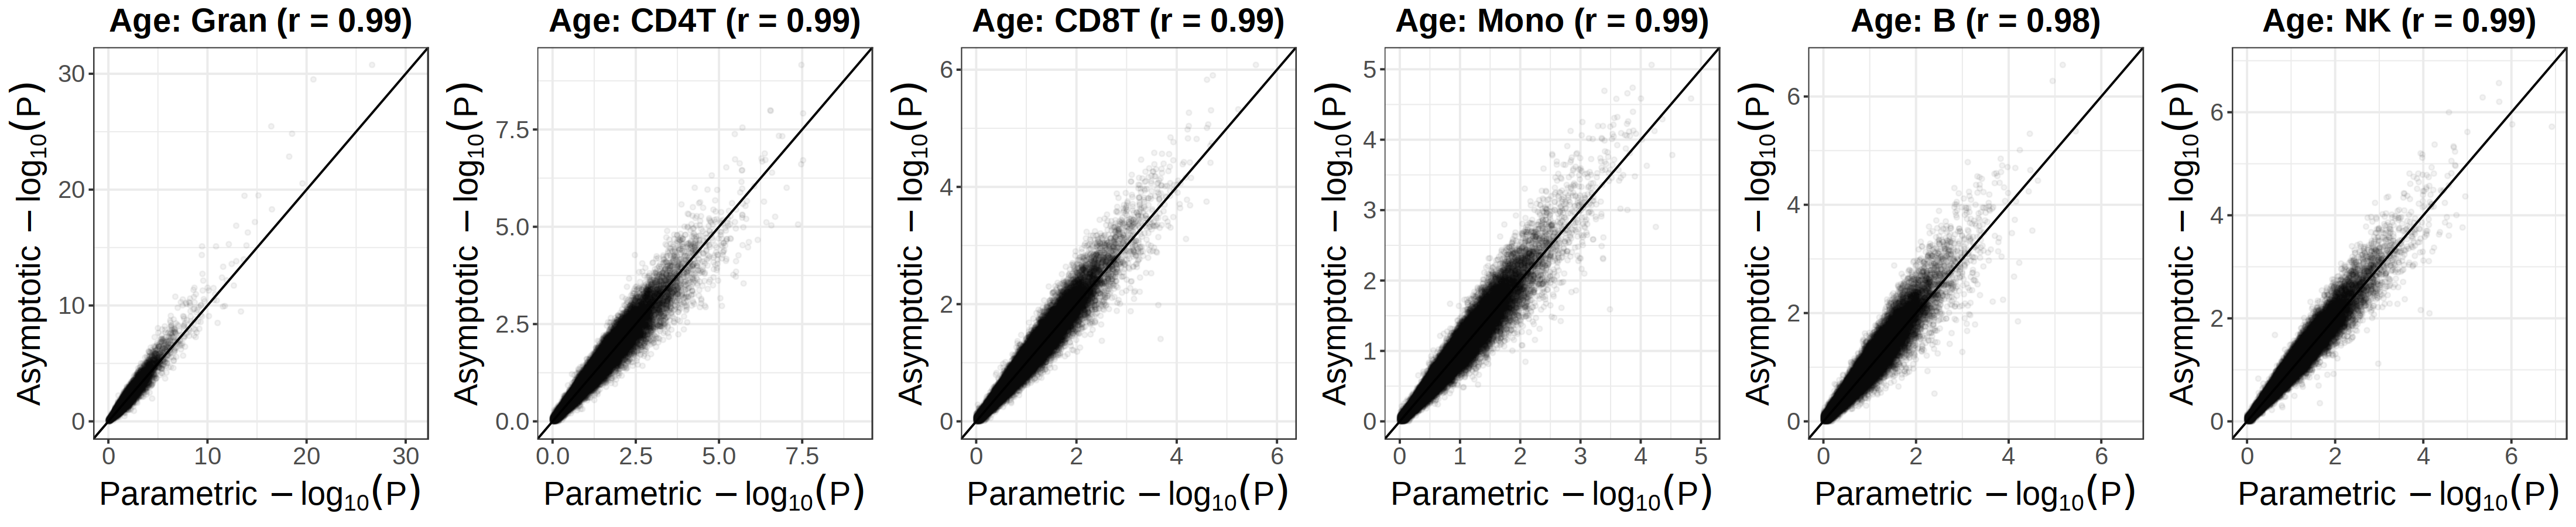

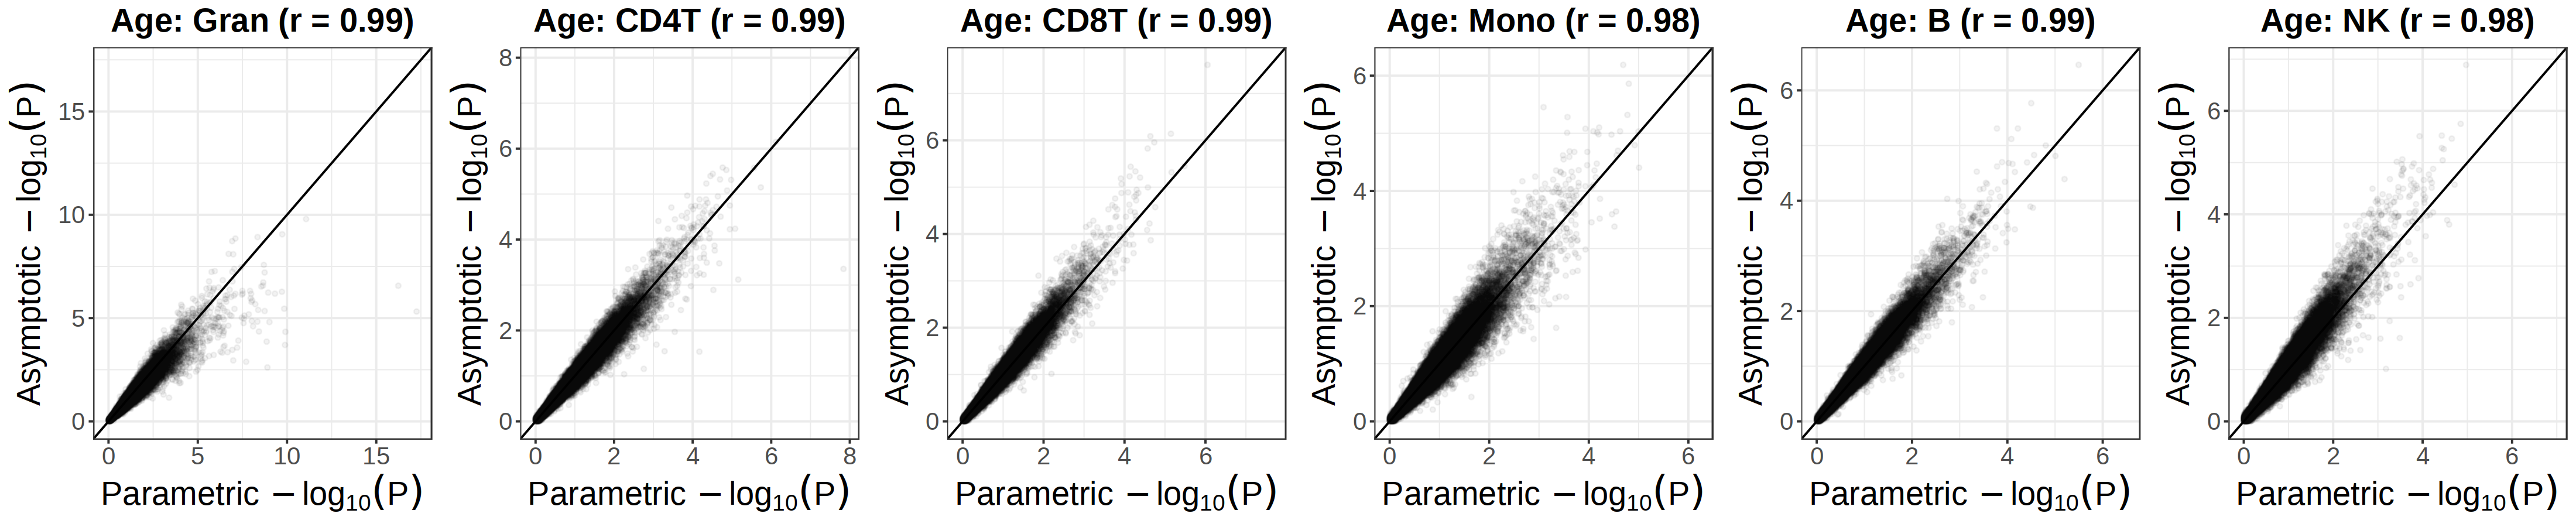

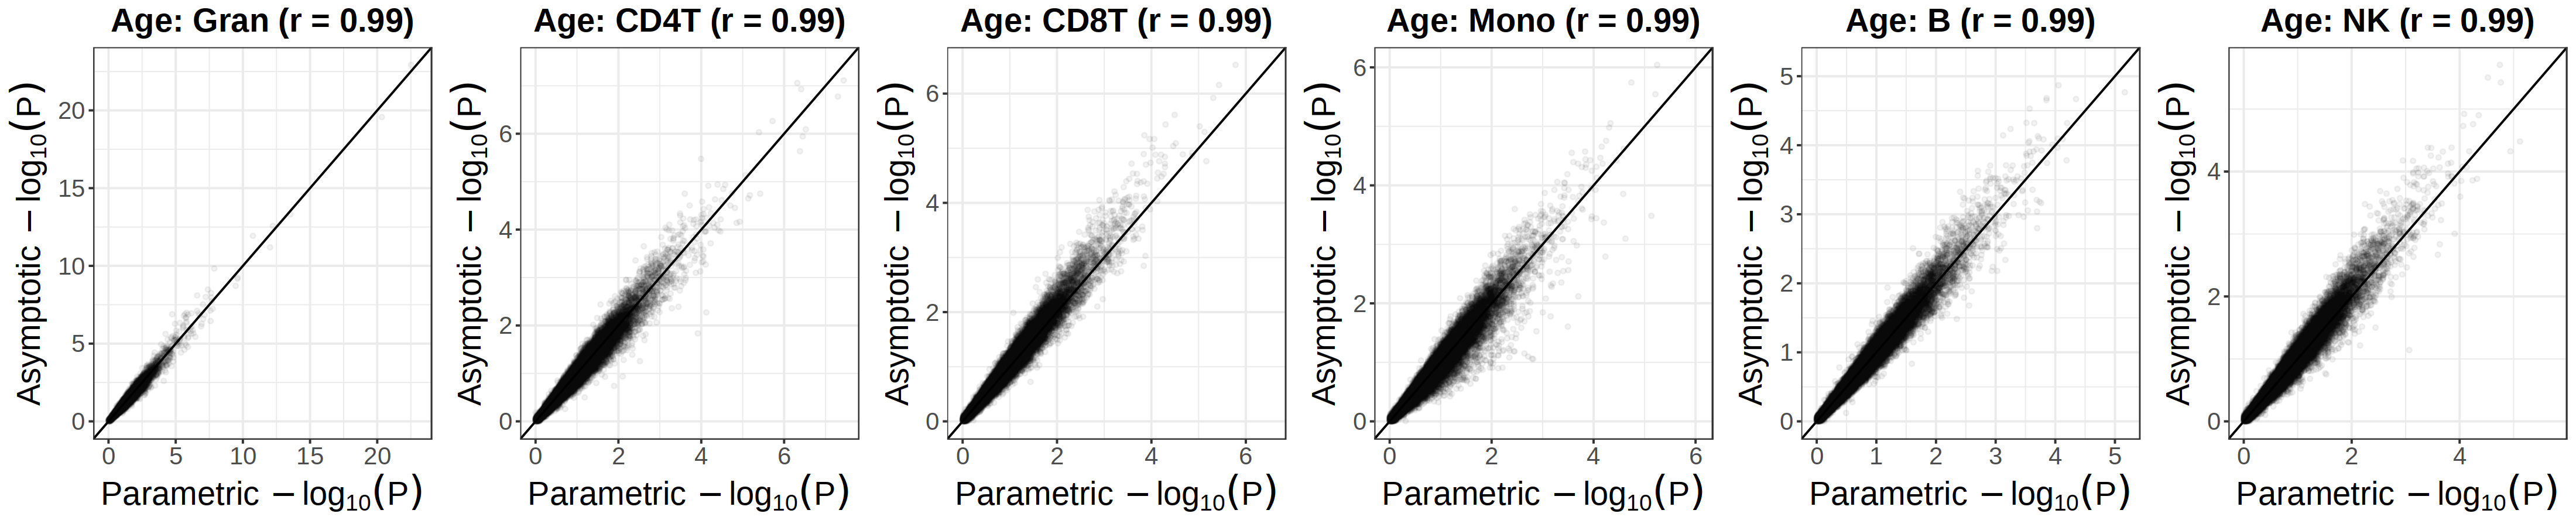

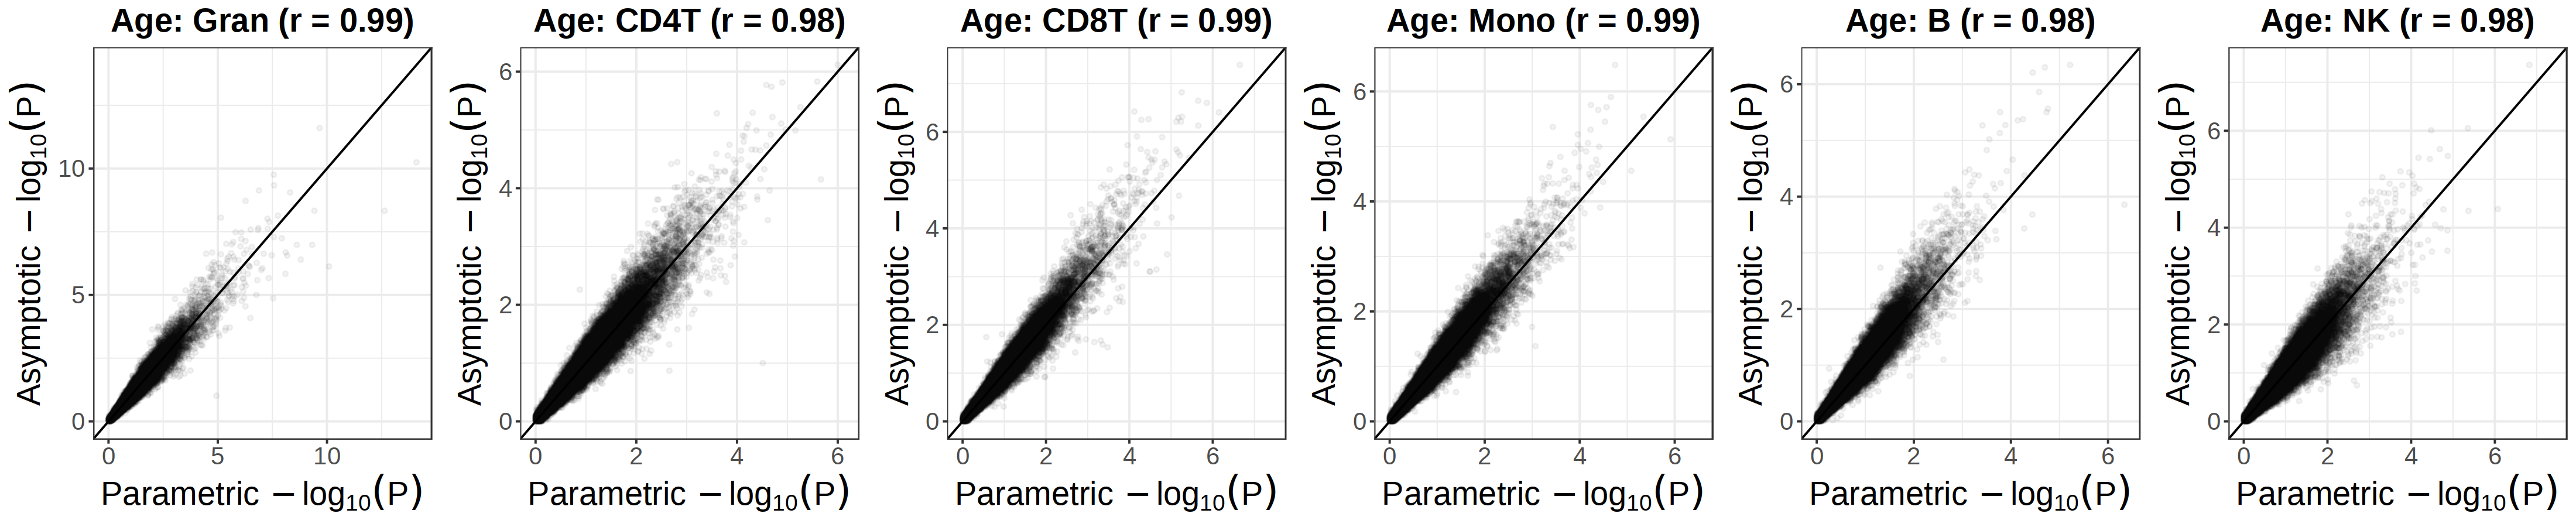

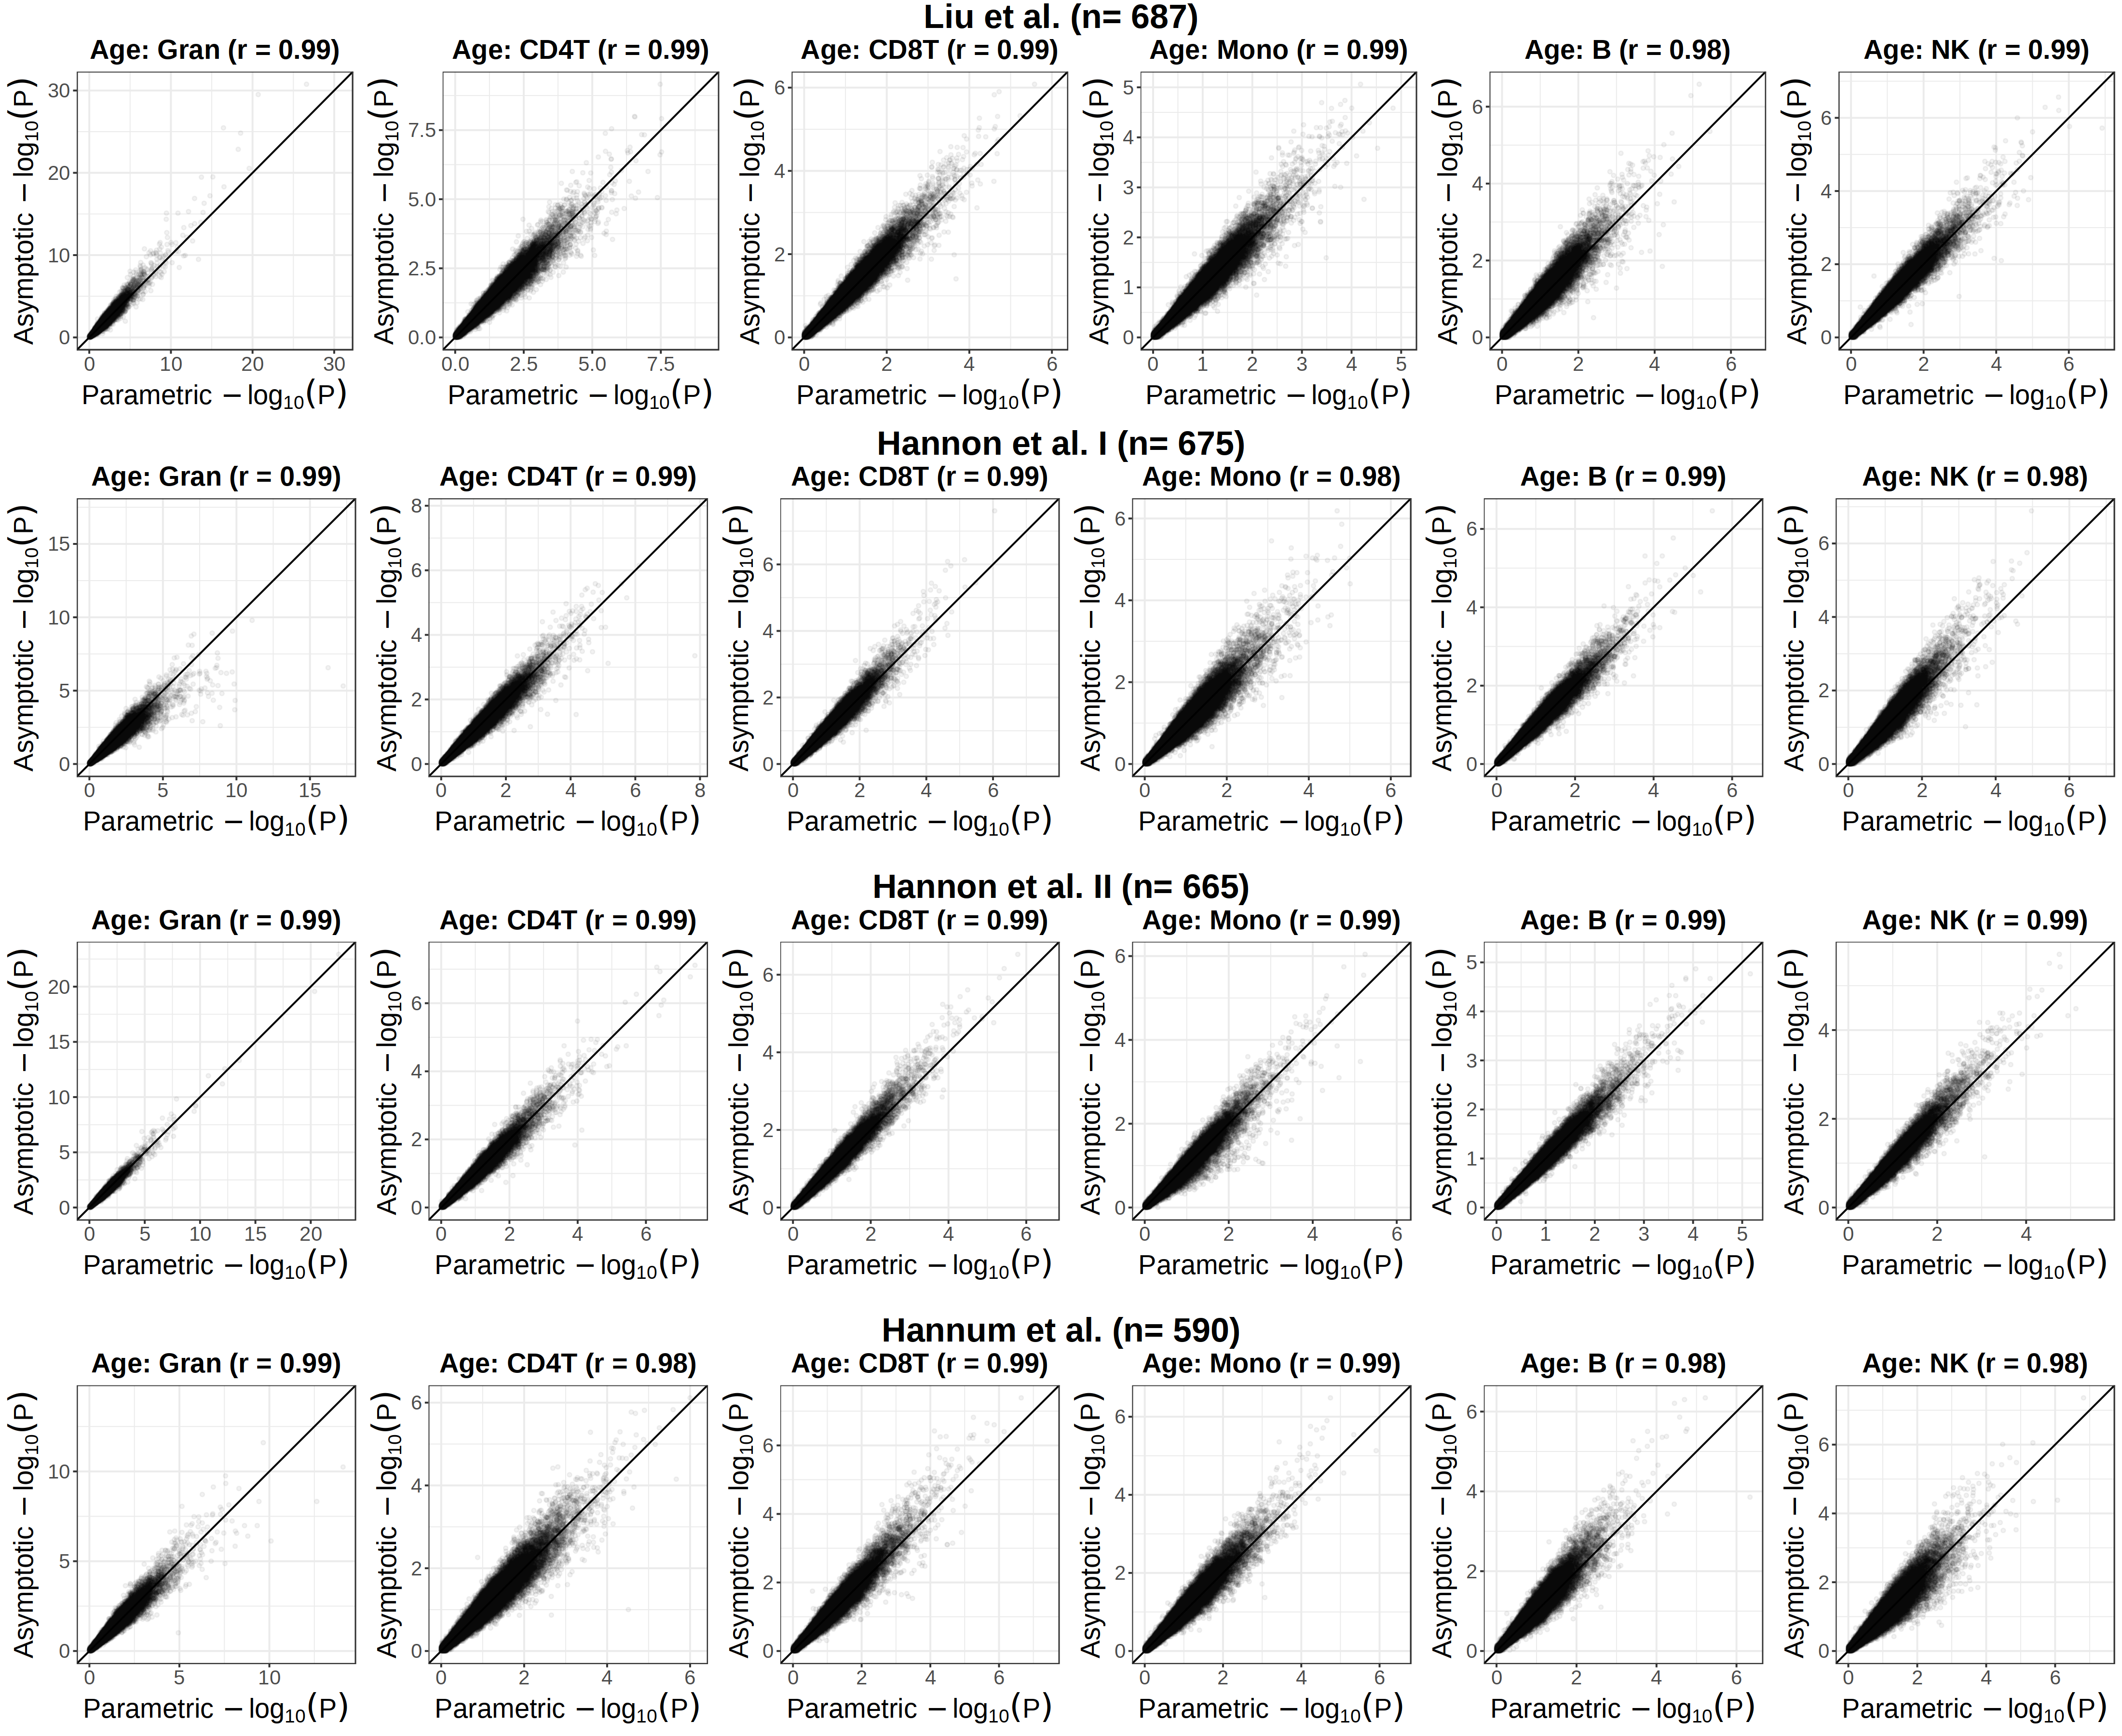

In [10]:
options(repr.plot.width = 22, repr.plot.height = 4.5, repr.plot.res = 200)
plts.X2 = list()
for (t in 1:length(data.names)){
    plts.X2[[t]] = plot_qq_compare(pvals_mat1 = pval.list[[t]][["TCAx.parametric.X2"]],
                                   pvals_mat2 = pval.list[[t]][["TCAx.asymptotic.X2V5"]],
                                   labels = labels, 
                                   ggarrange.nrow = 1, ggarrange.ncol = k, 
                                   alpha = 0.05, text.size = text.size,
                                   xlab = "Parametric", ylab = "Asymptotic", 
                                   title = full.data.names[[data.names[t]]])
}
compare.X2 = ggarrange(plts.X2[[1]], NULL, plts.X2[[2]], NULL, plts.X2[[3]], NULL, plts.X2[[4]], 
                      nrow = 2*length(data.names)-1, 
                      ncol = 1, 
                      heights = c(1, 0.01, 1, 0.05, 1, 0.05, 1)) 


options(repr.plot.width = 22, repr.plot.height = 18, repr.plot.res = 200)
compare.X2

In [11]:
# options(repr.plot.width = 22, repr.plot.height = 4.5, repr.plot.res = 200)
# plts.X2Q2 = list()
# for (t in 1:length(data.names)){
#     plts.X2Q2[[t]] = plot_qq_compare(pvals_mat1 = pval.list[[t]][["TCAx.parametric.X2Q2"]],
#                                      pvals_mat2 = pval.list[[t]][["TCAx.asymptotic.X2Q2V5"]],
#                                      labels = labels, 
#                                      ggarrange.nrow = 1, ggarrange.ncol = k, 
#                                      alpha = 0.05, text.size = text.size,
#                                      xlab = "Parametric", ylab = "Asymptotic", 
#                                      title = full.data.names[[data.names[t]]])
# }
# compare.X2Q2 = ggarrange(plts.X2Q2[[1]], NULL, plts.X2Q2[[2]], NULL, plts.X2Q2[[3]], NULL, plts.X2Q2[[4]], 
#                       nrow = 2*length(data.names)-1, 
#                       ncol = 1, 
#                       heights = c(1, 0.01, 1, 0.05, 1, 0.05, 1)) 

# options(repr.plot.width = 22, repr.plot.height = 18, repr.plot.res = 200)
# compare.X2Q2

# Null

In [12]:
max(100)

[1] 100

In [13]:
plot_qq<- function(pvals_mat, labels, ggarrange.nrow = 1, ggarrange.ncol = 1, 
                   alpha = 0.5, text.size = 10, 
                   title = ""){

    pvals = list()
  
    for (l in 1:ncol(pvals_mat)){
        pvals[[l]] = pvals_mat[,l]
    }

    significance_th <- list(alpha/length(pvals[[1]]))
    if(length(pvals)-1) significance_th[[2]] <- alpha/(length(pvals)*length(pvals[[1]]))
    
    qqplots <- lapply(1:length(pvals), function(p){
        df <- data.frame(pvals.obs = -log10(sort(pvals[[p]])), 
                         pvals.exp = -log10(sort((1:length(pvals[[p]]))/length(pvals[[p]]))));
        qqplot <- ggplot(df, aes(x = pvals.exp, y = pvals.obs)) +
                         stat_binhex(geom = "point", bins=1000, size=1, alpha = alpha) +
                         geom_abline() +
                         coord_cartesian(#xlim = c(min(df), max(-log10(df$pvals.exp))),
                                         ylim = c(min(df), max(max(df), -log10(significance_th[[2]])))
                                         #ylim = c(min(df),  -log10(significance_th[[2]]))
                                        ) +

                         theme_bw() +
                         guides(fill="none") +
                         ggtitle(labels[p]) +
                         xlab(expression(Expected~-log[10](P))) + 
                         ylab(expression(Observed~-log[10](P))) +


                         theme(plot.title = element_text(hjust = 0.5, size = text.size, face="bold"))+ 
                         theme(axis.title.x = element_text(size = text.size)) + 
                         theme(axis.text.x = element_text(size = text.size * 0.75)) + 
                         theme(axis.title.y = element_text(size = text.size)) +
                         theme(axis.text.y = element_text(size = text.size * 0.75)) 
                        
        #qqplot = qqplot + geom_hline(yintercept=-log10(significance_th[[1]]), linetype="dashed", color = "red", size=1  ) + 
        #                  geom_hline(yintercept=-log10(significance_th[[2]]), linetype="dashed", color = "red", size=0.5)  
        # only show the celltpye cpg wide 
        qqplot = qqplot + geom_hline(yintercept=-log10(significance_th[[2]]), linetype="dashed", color = "red", size=1) 
        return(qqplot)
    })
    g = egg::ggarrange(plots = qqplots, ncol = ggarrange.ncol, nrow = ggarrange.nrow)
    g = annotate_figure(g,top = text_grob(title, 
                                          color = "black", face = "bold", size = text.size + 5))
    return(g)
}


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


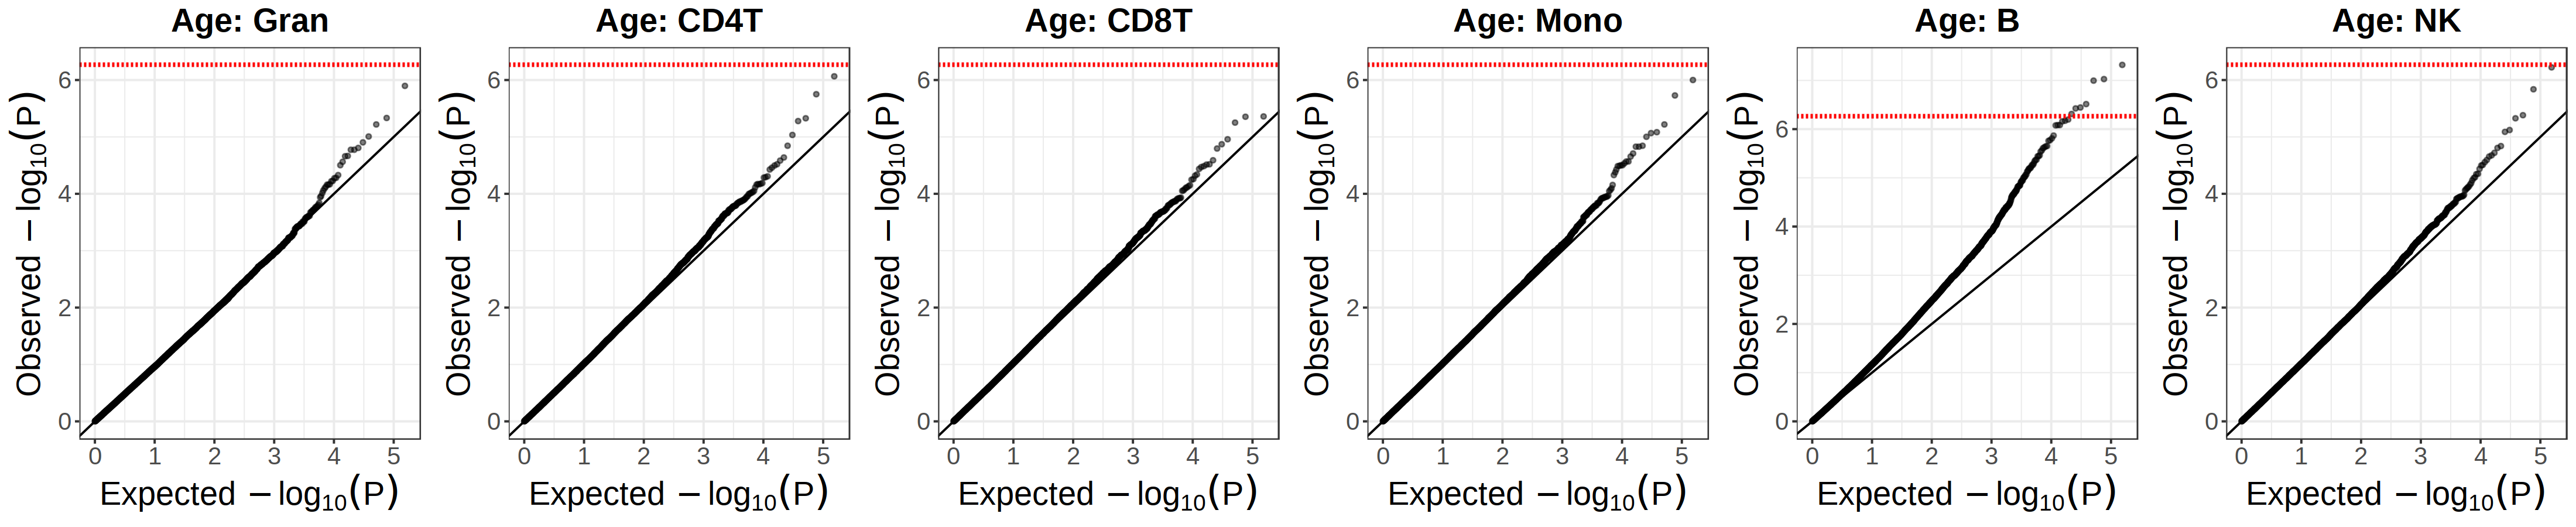

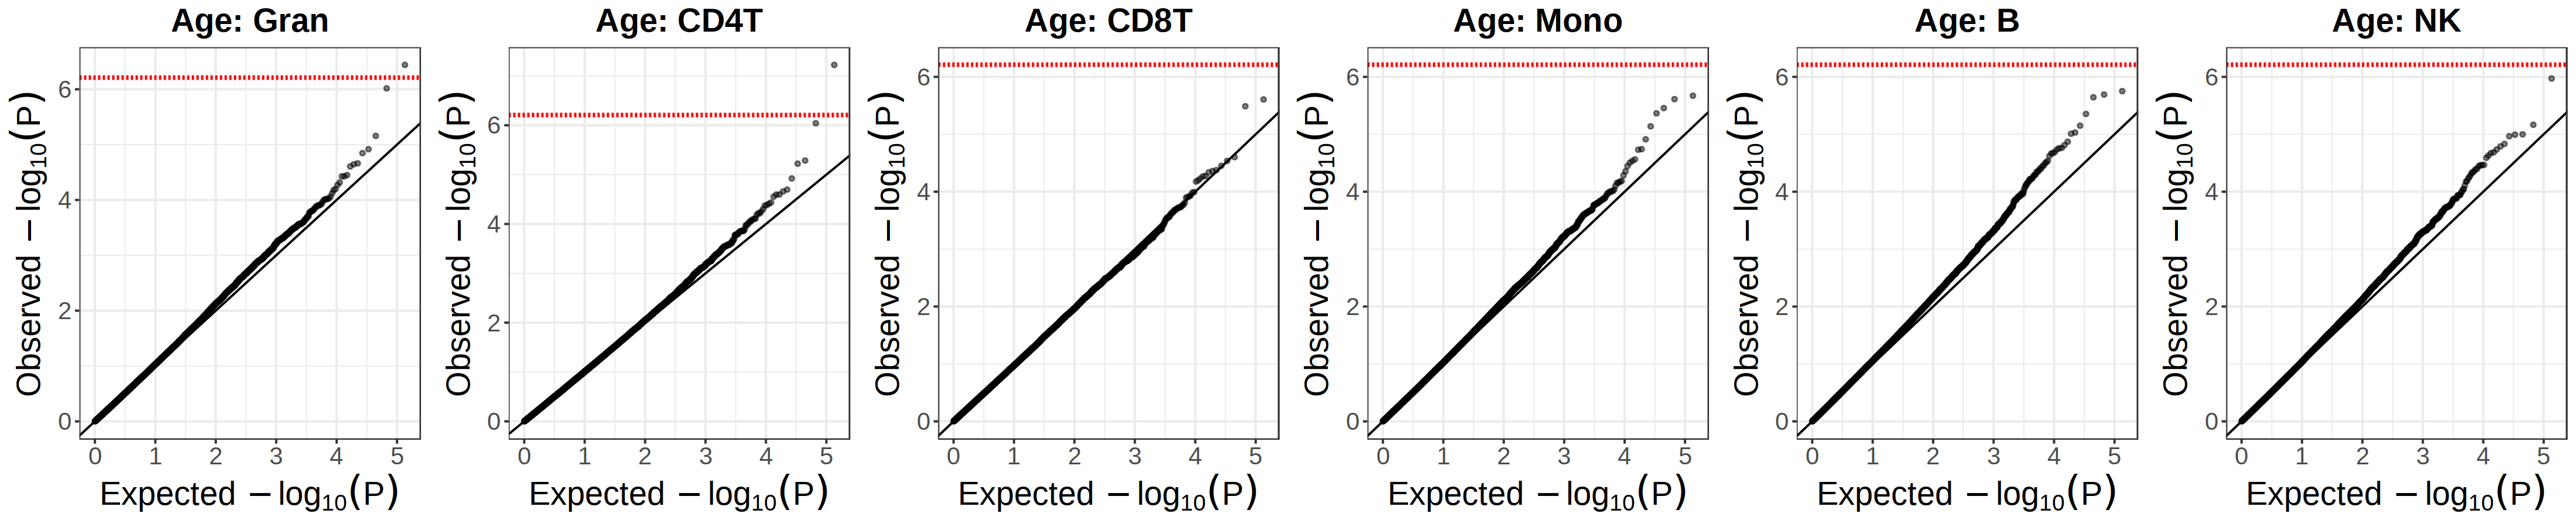

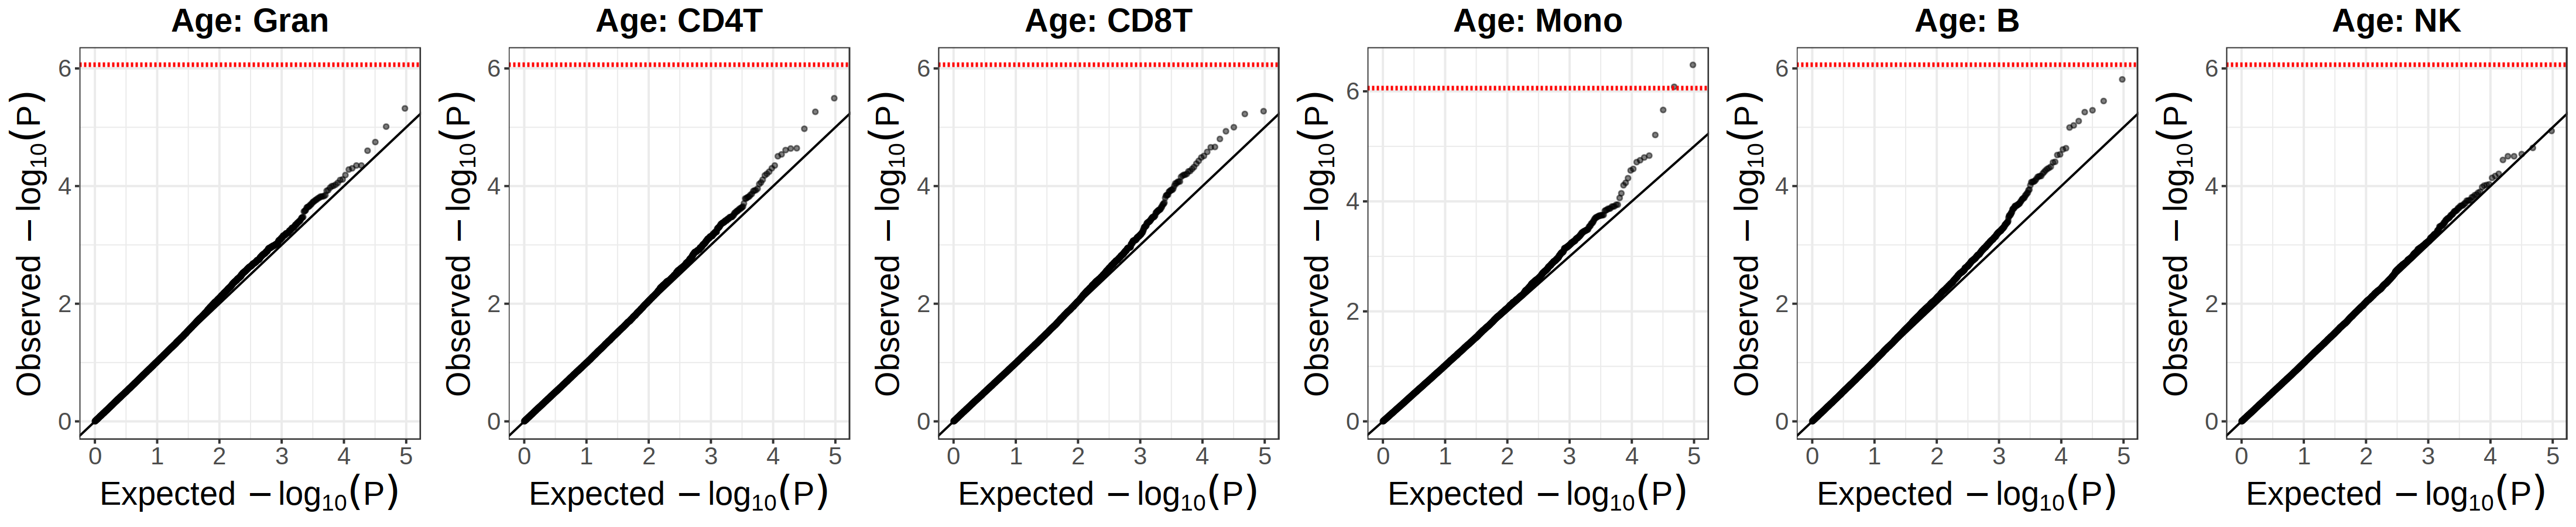

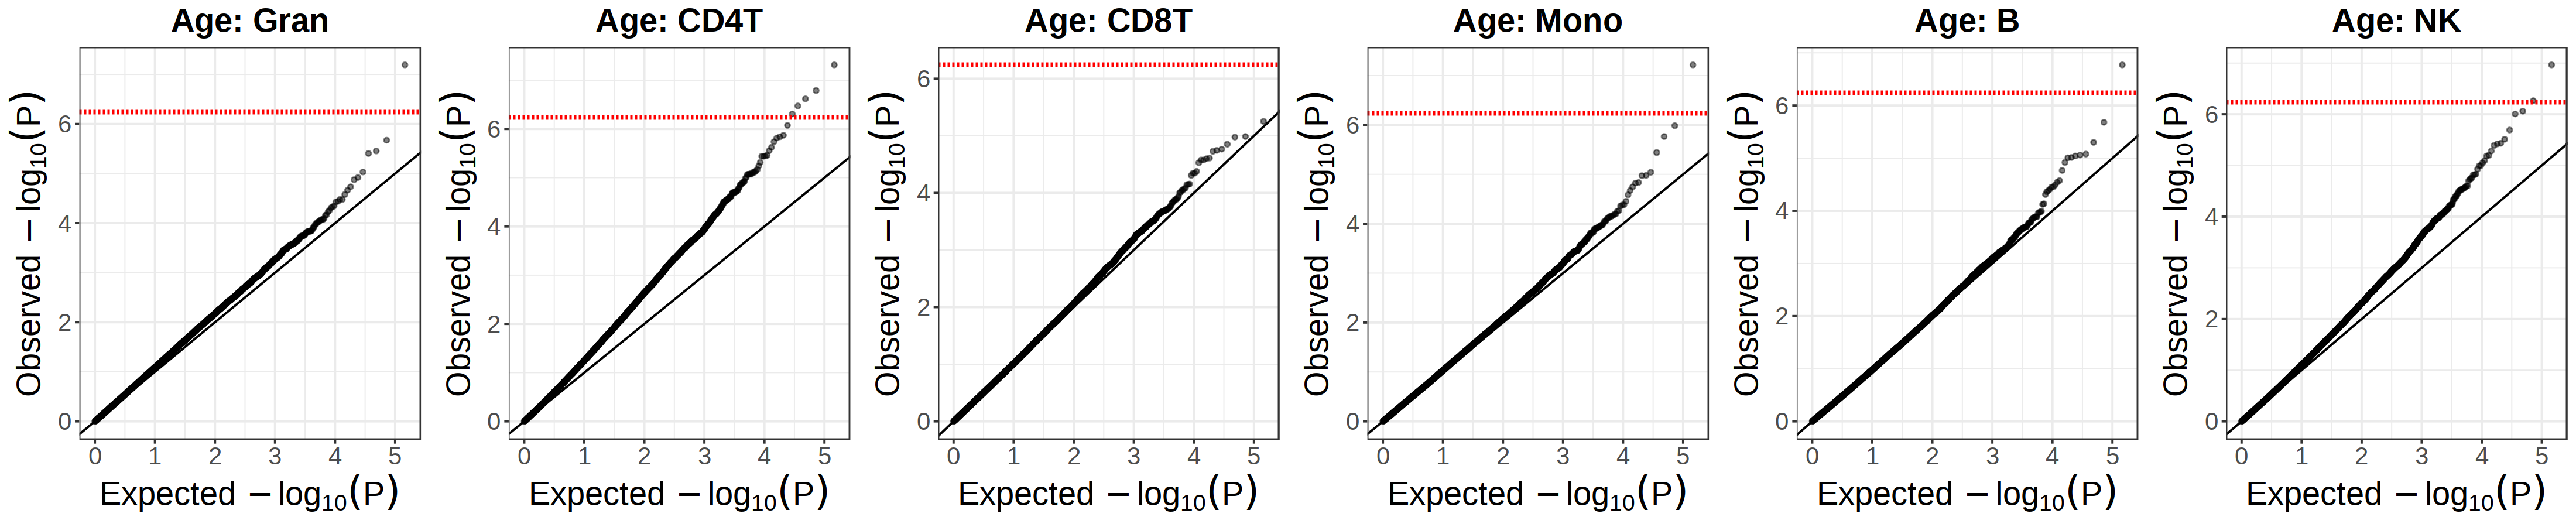

In [14]:
options(repr.plot.width = 22, repr.plot.height = 4.5, repr.plot.res = 200)
plts.X2V5.null = list()
for (t in 1:length(data.names)){
    plts.X2V5.null[[t]] = plot_qq(pvals_mat = pval.list[[t]][["TCAx.asymptotic.X2V5.null"]],
                                  labels = labels, 
                                  ggarrange.nrow = 1, ggarrange.ncol = k, 
                                  alpha = 0.5, text.size = text.size,
                                  title = full.data.names[[data.names[t]]])
}

calibrate.X2V5 = ggarrange(plts.X2V5.null[[1]], NULL, plts.X2V5.null[[2]], NULL, 
                           plts.X2V5.null[[3]], NULL, plts.X2V5.null[[4]], 
                           nrow = 2*length(data.names)-1, 
                           ncol = 1, 
                           heights = c(1, 0.05, 1, 0.05, 1, 0.05, 1)) 

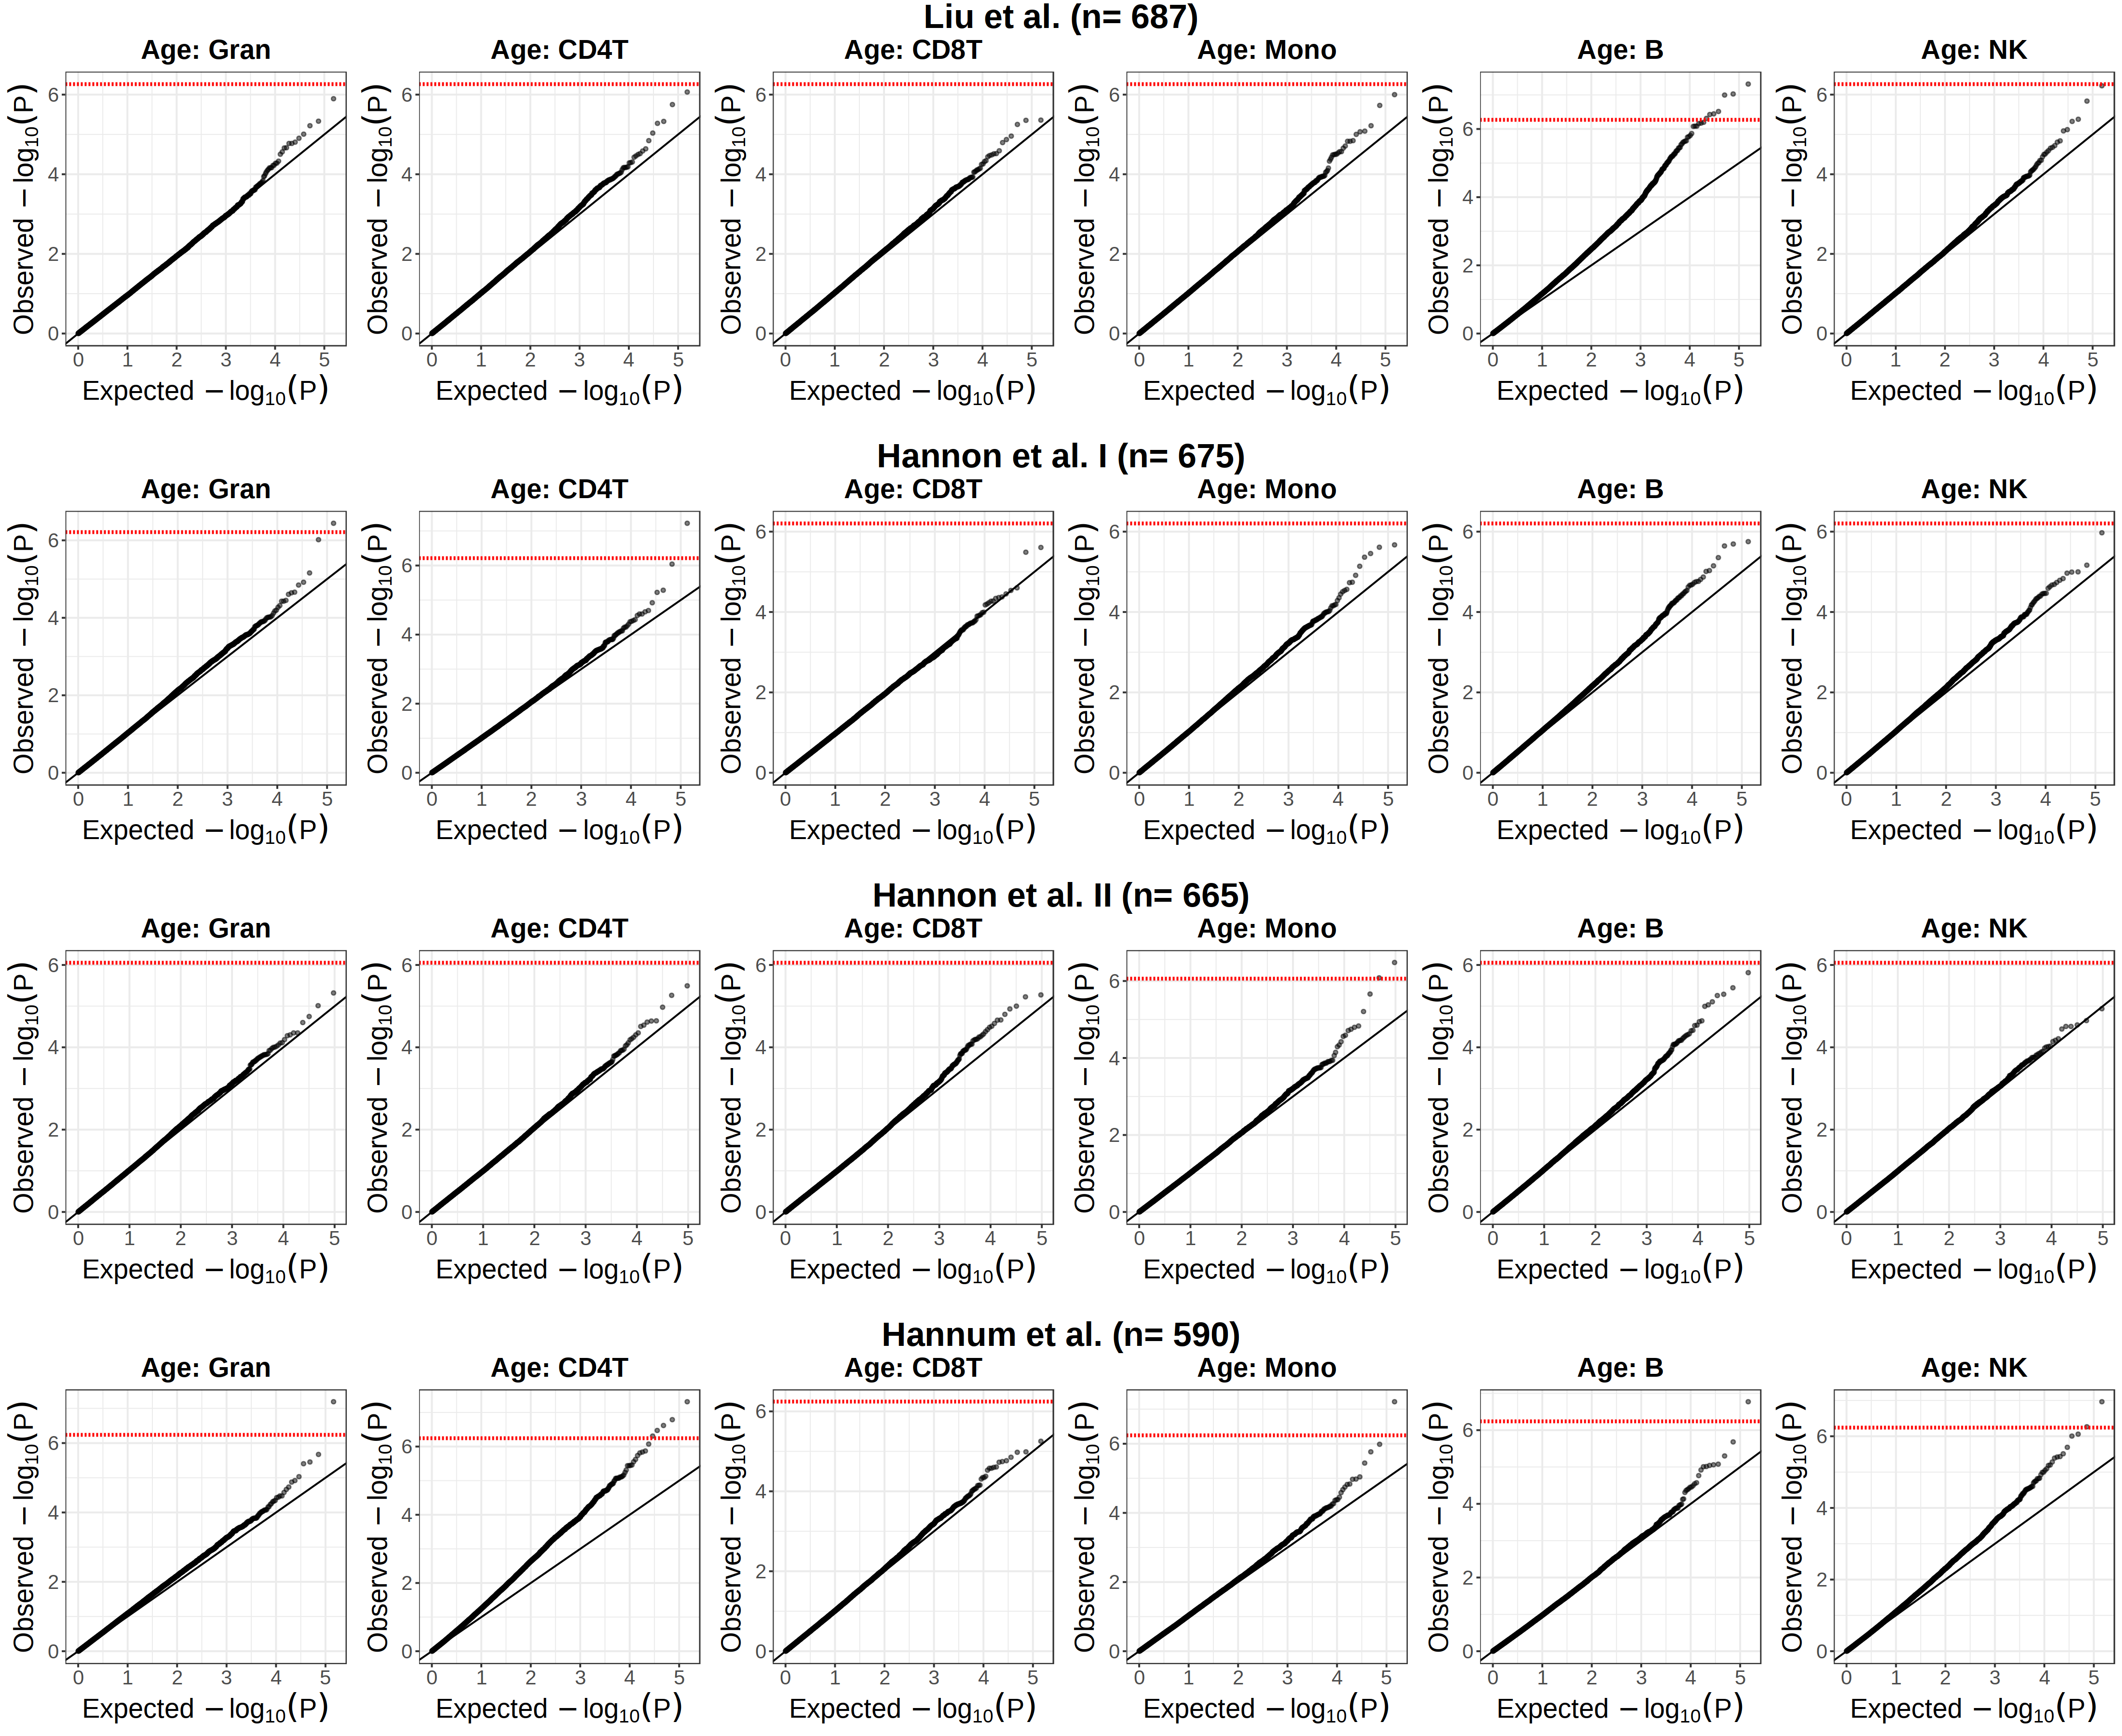

In [15]:
options(repr.plot.width = 22, repr.plot.height = 18, repr.plot.res = 200)
calibrate.X2V5

In [16]:
# plts.X2Q2V5.null = list()
# for (t in 1:length(data.names)){
#     plts.X2Q2V5.null[[t]] = plot_qq(pvals_mat = pval.list[[t]][["TCAx.asymptotic.X2Q2V5.null"]],
#                                     labels = labels, 
#                                     ggarrange.nrow = 1, ggarrange.ncol = k, 
#                                     alpha = 0.5, text.size = text.size,
#                                     title = full.data.names[[data.names[t]]])
# }

# calibrate.X2Q2V5 = ggarrange(plts.X2Q2V5.null[[1]], NULL, plts.X2Q2V5.null[[2]], NULL, 
#                              plts.X2Q2V5.null[[3]], NULL, plts.X2Q2V5.null[[4]], 
#                              nrow = 2*length(data.names)-1, 
#                              ncol = 1, 
#                              heights = c(1, 0.05, 1, 0.05, 1, 0.05, 1)) 


# options(repr.plot.width = 22, repr.plot.height = 18, repr.plot.res = 200)
# calibrate.X2Q2V5

# save 

In [17]:
file.path(figure.dir, "Asymptotic_fig.list.rds")

[1] "../Figure/Asymptotics/Asymptotic_fig.list.rds"

In [18]:
fig.list.file = file.path(figure.dir, "Asymptotic_fig.list.rds")
if(file.exists(fig.list.file)){
    fig.list = readRDS(fig.list.file)
}else{
    fig.list = list()
}

#fig.list[[paste0(pheno,".plts.X2Q2V5.null")]] = plts.X2Q2V5.null
fig.list[[paste0(pheno,".plts.X2V5.null")]]   = plts.X2V5.null
#fig.list[[paste0(pheno,".plts.X2Q2")]]        = plts.X2Q2
fig.list[[paste0(pheno,".plts.X2")]]          = plts.X2

saveRDS(fig.list, fig.list.file)

In [19]:
ggsave(file.path(figure.dir, paste0("Parametric.vs.Asymptotic.", pheno, ".X2.png")), 
       compare.X2,
       device = "png", width = 22, height = 18, bg = 'white')

ggsave(file.path(figure.dir, paste0("Asymptotic.", pheno, ".X2V5.null.png")), 
       calibrate.X2V5,
       device = "png", width = 22, height = 18, bg = 'white')

# ggsave(file.path(figure.dir, paste0("Parametric.vs.Asymptotic.", pheno, ".X2Q2.png")), 
#        compare.X2Q2,
#        device = "png", width = 22, height = 18, bg = 'white')

# ggsave(file.path(figure.dir, paste0("Asymptotic.", pheno, ".X2Q2V5.null.png")), 
#        calibrate.X2Q2V5,
#        device = "png", width = 22, height = 18, bg = 'white')



# Some old code on trying to stack all pannels together directly
# not working due to some alignment issue

In [20]:
# k = length(source.ids)
# labels = paste0(if(pheno == "gender") "Sex" else "Age", ": ", source.ids)    
# title.size = 20
# text.size =20
# xlab = "Parametric"; ylab = "Asymptotic"

# plts <- vector(mode = "list", length = length(data.names) * k)

# counter  = 1
# #loop over source.ids
# for (h in 1:k){ 
#     #loop over models
#     for (t in 1:length(data.names)){
        
#         pvals1 = pval.list[[t]][["TCAx.parametric.marginal"]][, h]
#         pvals2 = pval.list[[t]][["TCAx.asymptotic.marginal"]][, h]
        
#         df <- data.frame(pvals.1 = -log10(pvals1), 
#                          pvals.2 = -log10(pvals2))
#         qqplot <- ggplot(df, aes(x = pvals.1, y = pvals.2)) +
#                   stat_binhex(geom = "point", bins=1000, size=1) +
#                   geom_abline() +
#                   coord_cartesian(xlim = c(min(df), max(df)),
#                                   ylim = c(min(df), max(df))) + 

#                   theme_classic()+
#                   guides(fill="none") +
#                   xlab(parse(text = paste0("\'",xlab,"\'~", expression(-log[10](P))))) + 
#                   ylab(parse(text = paste0("\'",ylab,"\'~", expression(-log[10](P))))) +

#                   theme(plot.title = element_text(hjust = 0.5, size = text.size, face="bold"))+ 
#                   theme(axis.title.x = element_text(size = text.size)) + 
#                   theme(axis.text.x = element_text(size = text.size * 0.75)) + 
#                   theme(axis.title.y = element_text(size = text.size)) +
#                   theme(axis.text.y = element_text(size = text.size * 0.75)) 
        
#         #if not first dataset, dont show ylabel
#         if(t!=1){qqplot = qqplot + theme(axis.title.y=element_blank(), axis.text.y=element_blank())}
#         #if not last source, dont show xlabel
#         if(h!=k){qqplot = qqplot + theme(axis.title.x=element_blank(), axis.text.x=element_blank())}
#         plts[[counter]] = qqplot
#         counter = counter + 1
#     }
# }
    
# #add dataset names on the column
# for (counter in 1:length(full.data.names)){
#     full.data.name = full.data.names[counter]
#     plts[[counter]] = annotate_figure(plts[[counter]], top = text_grob(full.data.name, #vjust = 0.5,  
#                                       color = "black", face = "bold", size = title.size + 5))
# }

# #add source.ids on the row
# counter = 1
# for (h in 1:length(source.ids)){
#     plts[[counter]] = annotate_figure(plts[[counter]], left = text_grob(labels[h], #vjust = 0.5,  
#                                       rot = 90, color = "black", face = "bold", size = title.size + 5))
#     counter = counter + length(data.names)
# }

   
# options(repr.plot.width = 16, repr.plot.height = 24, repr.plot.res = 200)
# g = egg::ggarrange(plots = plts, ncol = 4, nrow = 6, 
#                    align = "h",
#                    widths = c(1, 1, 1, 1))
